In [123]:
import numpy as np
from Ridge import Ridge_parameters
from prepare_data import prepare_data
from polynomial_features import polynomial_features
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data()

Quick check to see if ridge_parameter functions works as expected

In [130]:
pol = 5
X_train = polynomial_features(x_train,pol, False)
X_test = polynomial_features(x_test, pol, False)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
y_offset = np.mean(y)

beta_Ridge = Ridge_parameters(X_train_s,y_train,1)
ridge = make_pipeline(StandardScaler(), Ridge(alpha=1.0))  
ridge.fit(X_train, y_train)

ridge.coef_

AttributeError: 'Pipeline' object has no attribute 'coef_'

In [114]:
pol = 15
lambdas = np.concatenate((np.logspace(-1,-5,14),np.array([0])))

mse_r2_scores = np.zeros((15,15))

pol_degrees = np.arange(1,pol+1,dtype=int)


for pol in pol_degrees:    
    X_train = polynomial_features(x_train,pol, False)
    X_test = polynomial_features(x_test, pol, False)

    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    y_offset = np.mean(y)

    for i,lam in enumerate(lambdas):
        beta_Ridge = Ridge_parameters(X_train_s,y_train,lambda_=lam)
        y_test_fit = X_test_s@beta_Ridge
        mse_r2_scores[pol-1,i] = mse(y_test,y_test_fit+y_offset)

df = pd.DataFrame(mse_r2_scores)
df.index = pol_degrees
df.columns = lambdas
df = df.rename_axis("Pol deg", axis=0).rename_axis("Lambda", axis=1)
df

Lambda,0.100000,0.049239,0.024245,0.011938,0.005878,0.002894,0.001425,0.000702,0.000346,0.000170,0.000084,0.000041,0.000020,0.000010,0.000000
Pol deg,,,,,,,,,,,,,,,
1,0.073957,0.073959,0.073960,0.073961,0.073961,0.073961,0.073961,0.073961,0.073961,0.073961,0.073961,0.073961,0.073961,0.073961,0.073961
2,0.044063,0.044092,0.044107,0.044114,0.044117,0.044119,0.044120,0.044120,0.044121,0.044121,0.044121,0.044121,0.044121,0.044121,0.044121
3,0.046148,0.046207,0.046236,0.046250,0.046258,0.046261,0.046263,0.046264,0.046264,0.046264,0.046264,0.046264,0.046265,0.046265,0.046265
4,0.020808,0.021391,0.021699,0.021857,0.021935,0.021974,0.021994,0.022003,0.022008,0.022010,0.022011,0.022012,0.022012,0.022012,0.022012
5,0.021031,0.021695,0.022054,0.022239,0.022333,0.022379,0.022402,0.022414,0.022419,0.022422,0.022424,0.022424,0.022425,0.022425,0.022425
6,0.008532,0.009182,0.011238,0.013171,0.014465,0.015206,0.015600,0.015800,0.015901,0.015951,0.015976,0.015988,0.015994,0.015997,0.016000
7,0.008566,0.009167,0.011149,0.013004,0.014236,0.014937,0.015307,0.015496,0.015590,0.015637,0.015660,0.015672,0.015678,0.015680,0.015683
8,0.012687,0.013444,0.011797,0.008263,0.004966,0.003931,0.005035,0.006785,0.008190,0.009066,0.009550,0.009802,0.009930,0.009994,0.010057
9,0.012625,0.013323,0.011676,0.008201,0.004980,0.004020,0.005207,0.007055,0.008558,0.009511,0.010046,0.010327,0.010471,0.010543,0.010613


In [115]:
latex_code = df.to_latex(index=False)

with open("table.tex", "w") as f:
    f.write(latex_code)

We had from the OLS that the polynomial of degree 12 had the lowest MSE.

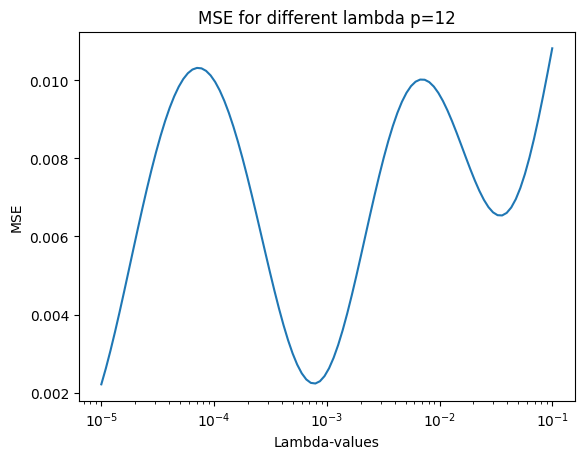

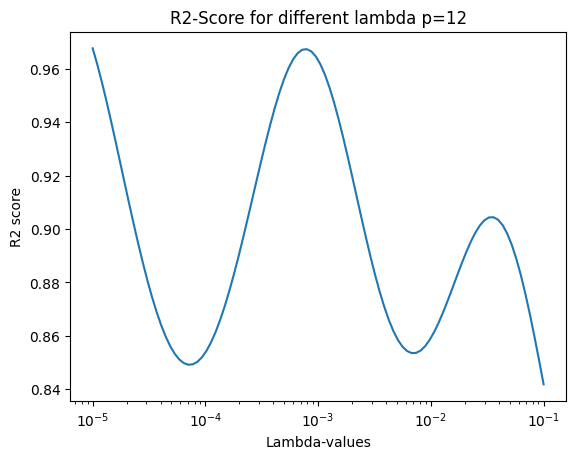

In [121]:
lambdas = np.logspace(-1,-5,100)
n = len(lambdas)

mse_scores = np.zeros(n)
r2_scores = np.zeros(n)

for i,lam in enumerate(lambdas):
    X_train = polynomial_features(x_train,12, False)
    X_test = polynomial_features(x_test, 12, False)

    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    y_offset = np.mean(y)

    beta_Ridge = Ridge_parameters(X_train_s,y_train,lam)
    y_test_fit = X_test_s@beta_Ridge+y_offset
    mse_scores[i] = mse(y_test,y_test_fit)
    r2_scores[i] = r2_score(y_test,y_test_fit)

plt.plot(lambdas,mse_scores)
plt.title("MSE for different lambda p=12")
plt.xscale("log")
plt.xlabel("Lambda-values")
plt.ylabel("MSE")
plt.show()

plt.plot(lambdas,r2_scores)
plt.title("R2-Score for different lambda p=12")
plt.xscale("log")
plt.xlabel("Lambda-values")
plt.ylabel("R2 score")
plt.show()

We had the lowest MSE in the table with a value of 0.002194 with a lambda of 10e-5 and polynomial degree of 13

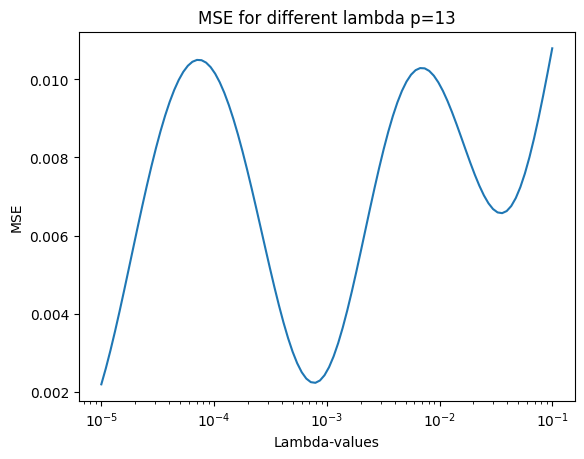

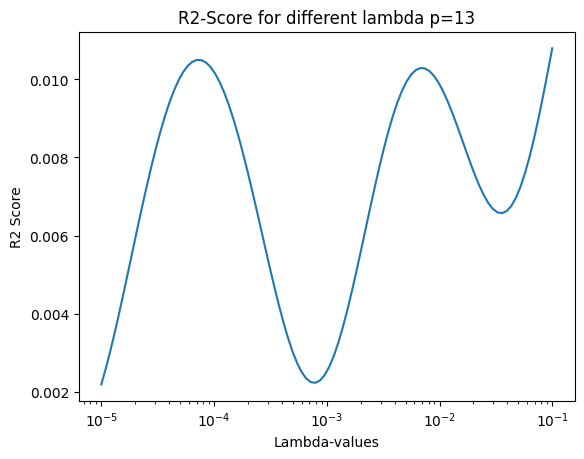

In [122]:
lambdas = np.logspace(-1,-5,100)
n = len(lambdas)

mse_scores = np.zeros(n)
r2_scores = np.zeros(n)

for i,lam in enumerate(lambdas):
    X_train = polynomial_features(x_train,13, False)
    X_test = polynomial_features(x_test, 13, False)

    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    y_offset = np.mean(y)

    beta_Ridge = Ridge_parameters(X_train_s,y_train,lam)
    y_test_fit = X_test_s@beta_Ridge+y_offset
    mse_scores[i] = mse(y_test,y_test_fit)
    r2_scores[i] = r2_score(y_test,y_test_fit)

plt.plot(lambdas,mse_scores)
plt.xscale("log")
plt.title("MSE for different lambda p=13")
plt.xlabel("Lambda-values")
plt.ylabel("MSE")
plt.show()

plt.plot(lambdas,mse_scores)
plt.xscale("log")
plt.title("R2-Score for different lambda p=13")
plt.xlabel("Lambda-values")
plt.ylabel("R2 Score")
plt.show()